In [73]:
# import all possible packages useful for multiple linear regression
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings("ignore")

In [74]:
#Import data set from hard drive
med = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_clean.csv", skiprows=0, delimiter=",")

In [75]:
#examine the list of variables, their data type and the shape of the data
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [76]:
#print the header 
med.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [77]:
#change the values of the ordinal categorical variable to numeric ranks
med['Complication_risk'].unique()
med['Complication_risk'] = med['Complication_risk'].map({'Low':0,'Medium':1,'High':2})

In [78]:
#change all binary categorical values to 0,1
med['ReAdmis'] = med['ReAdmis'].map({'No':0, "Yes":1})
med['Soft_drink'] = med['Soft_drink'].map({'No':0, "Yes":1})
med['HighBlood'] = med['HighBlood'].map({'No':0, "Yes":1})
med['Stroke'] = med['Stroke'].map({'No':0, "Yes":1})
med['Overweight'] = med['Overweight'].map({'No':0, "Yes":1})
med['Arthritis'] = med['Arthritis'].map({'No':0, "Yes":1})
med['Diabetes'] = med['Diabetes'].map({'No':0, "Yes":1})
med['Hyperlipidemia'] = med['Hyperlipidemia'].map({'No':0, "Yes":1})
med['BackPain'] = med['BackPain'].map({'No':0, "Yes":1})
med['Anxiety'] = med['Anxiety'].map({'No':0, "Yes":1})
med['Allergic_rhinitis'] = med['Allergic_rhinitis'].map({'No':0, "Yes":1})
med['Reflux_esophagitis'] = med['Reflux_esophagitis'].map({'No':0, "Yes":1})
med['Asthma'] = med['Asthma'].map({'No':0, "Yes":1})

In [79]:
#Create dummy columns for the Services column
med = pd.get_dummies(med, prefix=['Services','Marital','Gender', 'Initial_admin'], prefix_sep='_', dummy_na=False, columns=["Services","Marital","Gender","Initial_admin"])

In [80]:
#Check whether dummy columns were created
print(med.keys())

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admiss

In [81]:
X = med.drop(axis=1, columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'ReAdmis',])
y = med['ReAdmis']

In [82]:
#Split the data into training and test groups
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=944, stratify=y)

In [83]:
#Provide split data files
Training_file = pd.concat([X_train,y_train])
Test_file = pd.concat([X_test,y_test])
Training_file.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\D209_T1_training_data.csv")
Test_file.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\D209_T1_test_data.csv")

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1726  173]
 [  72 1029]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1899
           1       0.86      0.93      0.89      1101

    accuracy                           0.92      3000
   macro avg       0.91      0.92      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [85]:
#Accuracy of KNN
print('KNN Accuracy:', accuracy_score(y_test,y_pred))

KNN Accuracy: 0.9183333333333333


In [86]:
#Create logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

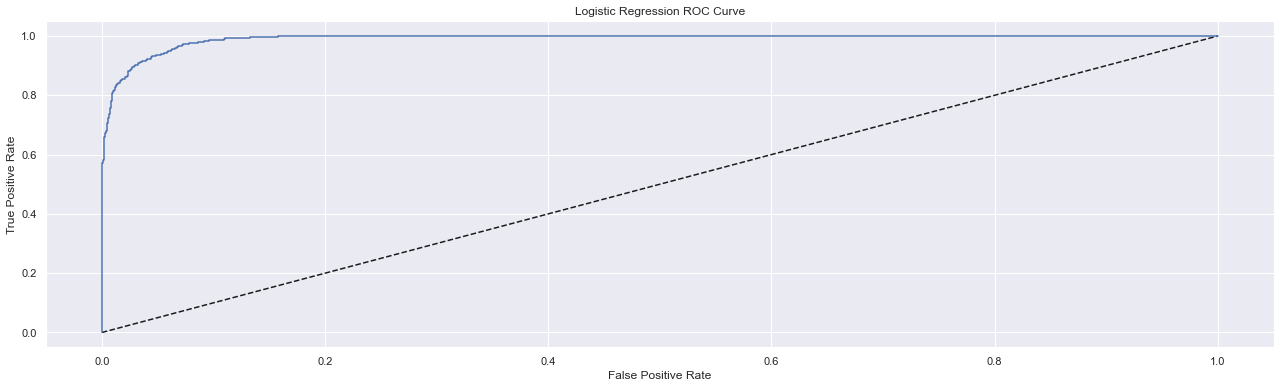

array([2.10587295e-07, 9.93869461e-01, 9.96720123e-01, ...,
       5.45484216e-07, 9.79306713e-01, 2.13875738e-06])

In [87]:
#plot the ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();
logreg.predict_proba(X_test)[:,1]


In [88]:
#Cross-validation scores
cv_scores = cross_val_score(logreg,X,y,cv=5, scoring='roc_auc')
print(cv_scores)

[1.         1.         1.         0.9978079  0.95907749]


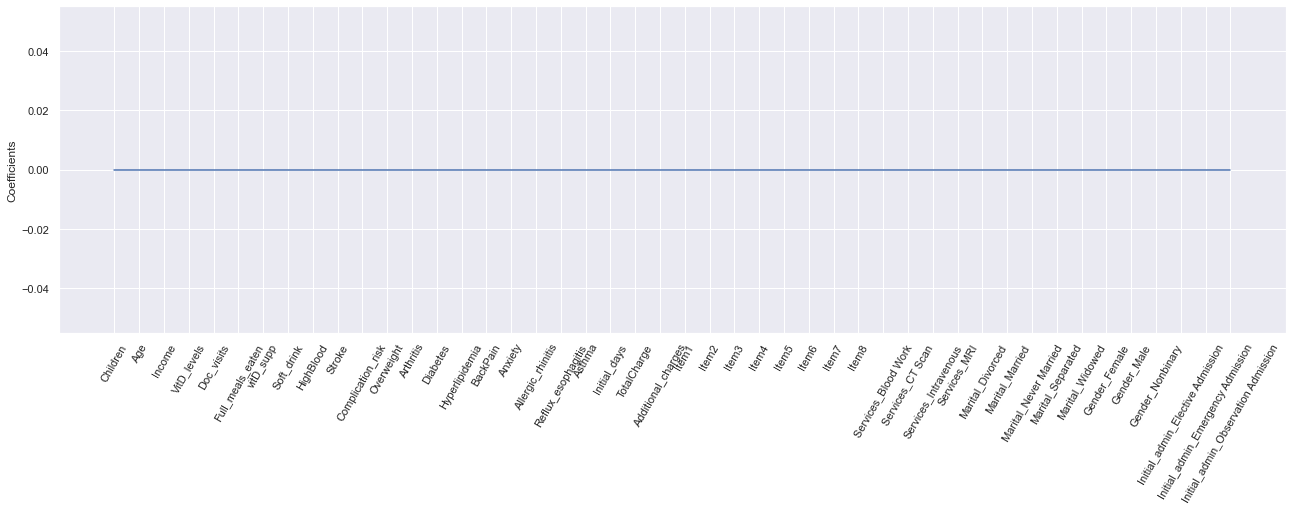

In [89]:
#Use Lasso for feature selection
sns.set(rc = {'figure.figsize':(22,6)})
names = X.columns
lasso = Lasso(alpha=0.43, normalize=True)
lasso_coef = lasso.fit(X,y).coef_
_=plt.plot(range(len(names)), lasso_coef)
_=plt.xticks(range(len(names)), names, rotation=60)
_=plt.ylabel('Coefficients')
plt.show()

In [90]:
#Regularized regression score
ridge= Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.7210700726713563

In [91]:
#Hyperparameter tuning 
param_grid = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_score_

0.916

In [92]:
#find the best number for ‘n-neighbors’
knn_cv.best_params_

{'n_neighbors': 3}

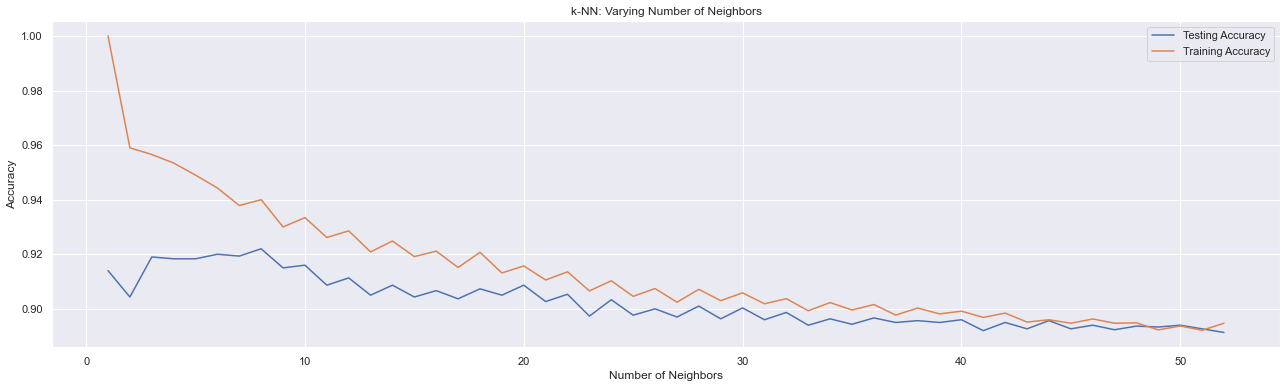

In [93]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 53)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [94]:
#Export prepared data
med.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\medical_prepared_D209_T2.csv")